# US Accidents Exploratory Data Analysis

In [3]:
pip install matplotlib --user --quietly


Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\python\python3.9\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\python\python3.9\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\python\python3.9\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\python\python3.9\python.exe -m pip install [options] [-e] <local project path> ...
  C:\python\python3.9\python.exe -m pip install [options] <archive url/path> ...

no such option: --quietly


In [4]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime


In [66]:
accidents_df = pd.read_csv("C:/datasets/US_Accidents_Dec21_updated.csv")

In [7]:
accidents_df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [8]:
accidents_df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
2845337    False
2845338    False
2845339    False
2845340    False
2845341    False
Length: 2845342, dtype: bool

In [9]:
accidents_df.shape

(2845342, 47)

In [10]:
accidents_df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [11]:
accidents_df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [12]:
missing_percentages = accidents_df.isna().sum().sort_values(ascending=False) / len(accidents_df)
missing_percentages

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

In [13]:
missing_percentages != 0

Number                    True
Precipitation(in)         True
Wind_Chill(F)             True
Wind_Speed(mph)           True
Wind_Direction            True
Humidity(%)               True
Weather_Condition         True
Visibility(mi)            True
Temperature(F)            True
Pressure(in)              True
Weather_Timestamp         True
Airport_Code              True
Timezone                  True
Nautical_Twilight         True
Civil_Twilight            True
Sunrise_Sunset            True
Astronomical_Twilight     True
Zipcode                   True
City                      True
Street                    True
Country                  False
Junction                 False
Start_Time               False
End_Time                 False
Start_Lat                False
Turning_Loop             False
Traffic_Signal           False
Traffic_Calming          False
Stop                     False
Station                  False
Roundabout               False
Railway                  False
No_Exit 

<AxesSubplot: >

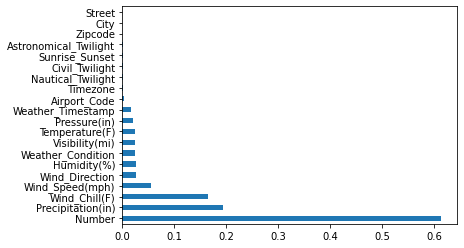

In [14]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

# Exploratory Analysis and Visualization

columns we analyse

In [15]:
accidents_df.City


0               Dublin
1               Dayton
2           Cincinnati
3                Akron
4           Cincinnati
              ...     
2845337      Riverside
2845338      San Diego
2845339         Orange
2845340    Culver City
2845341       Highland
Name: City, Length: 2845342, dtype: object

In [16]:
cities = accidents_df.City.unique()
len(cities)

11682

In [17]:
cities_by_accidents = accidents_df.City.value_counts()
cities_by_accidents

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

<AxesSubplot: >

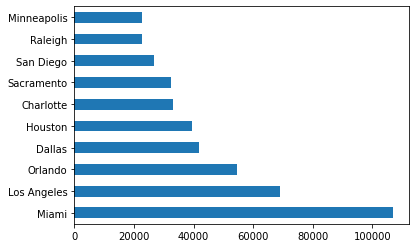

In [18]:
cities_by_accidents[:10].plot(kind='barh')

In [19]:
value_to_search = "New York"
is_value_present = value_to_search in accidents_df["City"].values
is_value_present

True

C:\python\python3.9\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='City', ylabel='Density'>

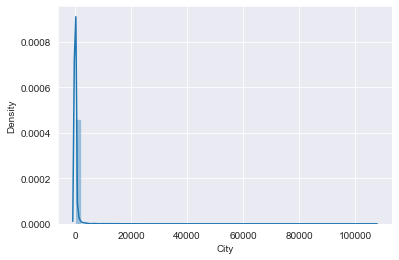

In [20]:
sns.set_style("darkgrid")
sns.distplot(cities_by_accidents)

In [21]:
high_accident_cities = cities_by_accidents[cities_by_accidents > 1000]
low_accident_cities = cities_by_accidents[cities_by_accidents < 1000]

In [22]:
len(high_accident_cities) / len(cities)

0.04228727957541517

<AxesSubplot: xlabel='City', ylabel='Count'>

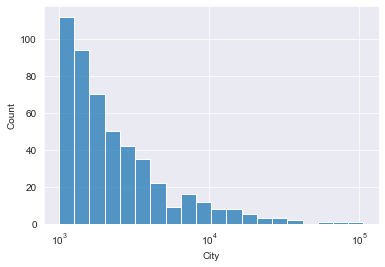

In [23]:
sns.histplot(high_accident_cities, log_scale=True)

<AxesSubplot: xlabel='City', ylabel='Count'>

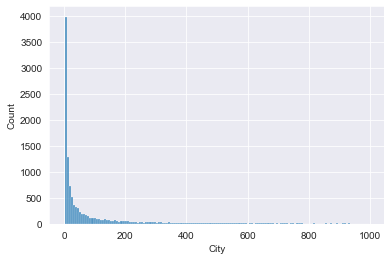

In [24]:
sns.histplot(low_accident_cities)

In [25]:
cities_by_accidents[cities_by_accidents == 1]

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

In [26]:
accidents_df.Start_Time               

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [27]:
accidents_df['Start_Time'] = pd.to_datetime(accidents_df['Start_Time'])

C:\python\python3.9\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Start_Time'>

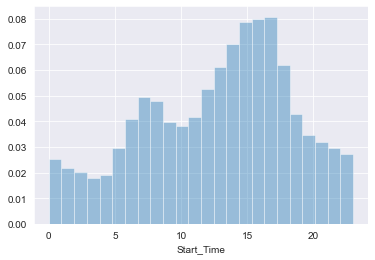

In [28]:
sns.distplot(accidents_df.Start_Time.dt.hour, bins=24,hist=True, kde=False, norm_hist=True) 


- A high percentages of accidents occur between 3pm to 6pm (probably people going home from offices)
- Next highest percentages is 6am to 8am(Due to hurry to get to work)  

<AxesSubplot: xlabel='Start_Time'>

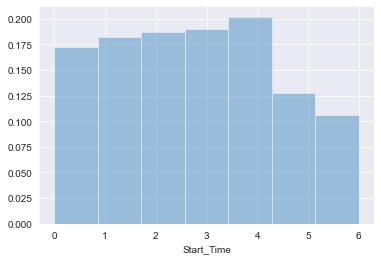

In [29]:
sns.distplot(accidents_df.Start_Time.dt.dayofweek, bins=7,hist=True, kde=False, norm_hist=True) 


Is the distribution of accidents by hour the same on weekends as weekdays

<AxesSubplot: xlabel='Start_Time'>

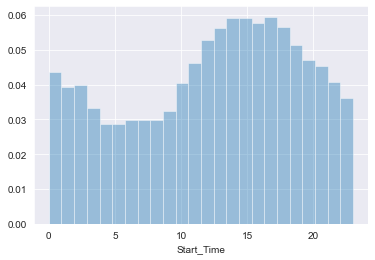

In [30]:
sunday_start_time = accidents_df[accidents_df.Start_Time.dt.dayofweek == 6]

sns.distplot(sunday_start_time.Start_Time.dt.hour, bins=24,hist=True, kde=False, norm_hist=True) 


<AxesSubplot: xlabel='Start_Time'>

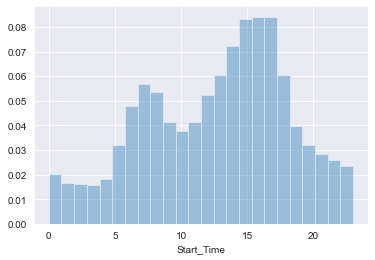

In [31]:
monday_start_time = accidents_df[accidents_df.Start_Time.dt.dayofweek == 0]

sns.distplot(monday_start_time.Start_Time.dt.hour, bins=24,hist=True, kde=False, norm_hist=True) 


on sundays peak hours early morning  and 5pm

<AxesSubplot: xlabel='Start_Time'>

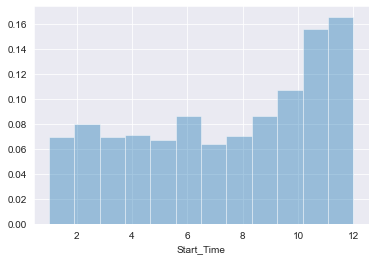

In [32]:
sns.distplot(monday_start_time.Start_Time.dt.month, bins=12,hist=True, kde=False, norm_hist=True) 


accidents on summers is low compare to winters maybe due to heavy snowfall and festive season

<AxesSubplot: xlabel='Start_Time'>

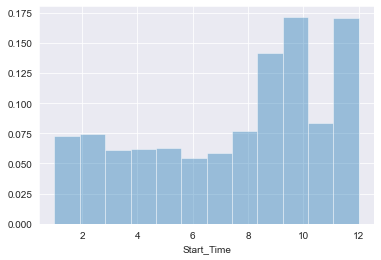

In [33]:
df_2019 = accidents_df[accidents_df.Start_Time.dt.year == 2019] 
sns.distplot(df_2019.Start_Time.dt.month, bins=12,hist=True, kde=False, norm_hist=True) 


data is missng in 2020,2016

In [34]:
accidents_df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [35]:
## Start Latitude & Longitude

accidents_df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [36]:
accidents_df.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

In [37]:
sample_df = accidents_df.sample(int(0.1 * len(accidents_df)))


<AxesSubplot: xlabel='Start_Lng', ylabel='Start_Lat'>

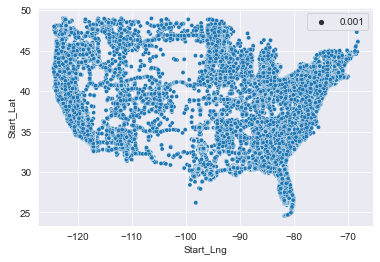

In [38]:
sns.scatterplot(x= sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

In [39]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [40]:
import folium


In [41]:
lat = 37.7749
lon = -122.4194
folium.Map(location=[lat, lon], zoom_start=13)

# Add a marker at the given Latitude and Longitude
#folium.Marker(location=[lat, lon]).add_to(map)

In [42]:

lat, lon = accidents_df.Start_Lat[0], accidents_df.Start_Lng[0]
lat, lon

(40.10891, -83.09286)

In [43]:
for x in accidents_df[['Start_Lat','Start_Lng']].sample(100).iteritems():
    print(x)

('Start_Lat', 1794421    34.436074
1738242    39.270810
730417     28.296032
775930     30.315075
571900     32.820712
             ...    
1366165    35.816427
2116254    41.553330
101424     42.502780
2579041    28.509630
566276     41.494486
Name: Start_Lat, Length: 100, dtype: float64)
('Start_Lng', 1794421   -119.601385
1738242   -123.242569
730417     -81.599286
775930     -81.770634
571900     -80.047897
              ...    
1366165    -80.825847
2116254    -81.575430
101424     -71.123250
2579041    -81.414580
566276     -73.160736
Name: Start_Lng, Length: 100, dtype: float64)


In [44]:
## zip takes two or more iterables as input, and returns an iterator of tuples.

latlng_list = list(zip(list(accidents_df.Start_Lat),(accidents_df.Start_Lng)))

In [45]:
!pip install folium --upgrade


In [46]:
from folium.plugins import HeatMap

In [47]:
sample_df = accidents_df.sample(int(0.1 * len(accidents_df)))
lat_long_pairs = list(zip(list(sample_df.Start_Lat),(sample_df.Start_Lng)))

In [58]:
map = folium.Map()
HeatMap(lat_long_pairs[:500]).add_to(map)
map


In [50]:
top_5_accidents = accidents_df['State'].value_counts()
top_5_accidents

CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
NY    108049
PA     99975
MN     97185
NC     91362
SC     89216
MD     65085
AZ     56504
NJ     52902
TN     52613
UT     49193
LA     47232
IL     47105
MI     43843
GA     40086
WA     32554
CT     29762
MO     29633
CO     25340
OH     24409
IN     20850
AL     19322
MT     15964
AR     10935
IA      9607
DC      9133
KS      9033
OK      8806
ID      8544
WI      7896
WV      7632
KY      6638
MA      6392
NV      6197
MS      5320
DE      4842
RI      4451
NH      3866
NE      3320
NM      2370
ND      2258
ME      2193
WY       990
VT       365
SD       201
Name: State, dtype: int64

In [51]:
(accidents_df['City'] == 'New York').count()


2845342

In [52]:
sample_df = accidents_df.sample(int(0.1 * len(accidents_df)))


In [57]:


# count the number of accidents by state
state_counts = accidents_df['State'].value_counts()


# get the top 5 states with the highest number of accidents
top_5_states_by_accidents = state_counts.head(5)
print("Top 5 states by number of accidents:")
print(top_5_states_by_accidents)

# count the number of accidents by city
city_counts = accidents_df['City'].value_counts()

# calculate per capita accidents by city
city_counts = city_counts / city_counts.sum() * 1000000

# add the per capita count to the original dataframe
accidents_df['Per Capita'] = accidents_df['City'].map(city_counts)

# group the data by state and sum the per capita count
per_capita_counts = accidents_df.groupby('State')['Per Capita'].sum()

# get the top 5 states with the highest per capita accidents
top_5_states_by_per_capita = per_capita_counts.sort_values(ascending=False).head(5)
print("\nTop 5 states by per capita accidents:")
print(top_5_states_by_per_capita)


Top 5 states by number of accidents:
CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
Name: State, dtype: int64

Top 5 states by per capita accidents:
State
FL    5.444657e+09
CA    3.115384e+09
TX    1.328077e+09
NC    5.799015e+08
MN    2.997310e+08
Name: Per Capita, dtype: float64


<AxesSubplot: ylabel='State'>

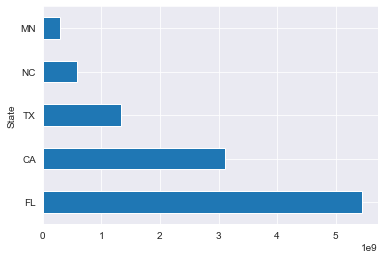

In [54]:
top_5_states_by_per_capita.plot(kind='barh')
